# Frequency analysis for annual maximum lake levels ($m$) for Lake Wakatipu

The notebook is trying to do a high flow frequency analysis as a demostration.

In [1]:
import mpl_setting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.max_columns', None)

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def highlight_cols(s, col_dict):
    if s.name in col_dict.keys():
        return ['background-color: {}'.format(col_dict[s.name])] * len(s)
    return [''] * len(s)

## 0. Data

The annual maximum lake level (m) for Lake Wakatipu were used for this illustration. The following string contains the information on this data:

In [2]:
s = \
"""
1,1924,312.1,,,,,,,
2,1925,311.04,,,,,,,
3,1926,310.79,,,,,,,
4,1927,310.64,,,,,,,
5,1928,311.25,,,,,,,
6,1929,310.59,,,,,,,
7,1930,310.29,,,,,,,
8,1931,310.84,,,,,,,
9,1932,310.33,,,,,,,
10,1933,310.66,,,,,,,
11,1934,310.36,,,,,,,
12,1935,310.61,,,,,,,
13,1936,310.56,,,,,,,
14,1937,310.49,,,,,,,
15,1938,310.41,,,,,,,
16,1939,310.41,,,,,,,
17,1940,310.89,,,,,,,
18,1941,310.59,,,,,,,
19,1942,310.76,,,,,,,
20,1943,310.59,,,,,,,
21,1944,310.36,,,,,,,
22,1945,310.82,,,,,,,
23,1946,311.32,,,,,,,
24,1947,310.29,,,,,,,
25,1948,311.33,,,,,,,
26,1949,311.1,,,,,,,
27,1950,310.78,,,,,,,
28,1951,310.37,,,,,,,
29,1952,311.1,,,,,,,
30,1953,310.52,,,,,,,
31,1954,310.37,,,,,,,
32,1955,310.39,,,,,,,
33,1956,310.75,,,,,,,
34,1957,311.59,,,,,,,
35,1958,311.42,,,,,,,
36,1959,310.61,,,,,,,
37,1960,310.72,,,,,,,
38,1961,310.42,,,,,,,
39,1962,310.29,,,,,,,
40,1963,310.032,,,,,,,
41,1964,310.635,,,,,,,
42,1965,310.583,,,,,,,
43,1966,310.488,,,,,,,
44,1967,311.151,,,,,,,
45,1968,311.232,,,,,,,
46,1969,311.058,,,,,,,
47,1970,311.014,,,,,,,
48,1971,310.419,,,,,,,
49,1972,310.681,,,,,,,
50,1973,310.693,,,,,,,
51,1974,310.272,,,,,,,
52,1975,311.206,,,,,,,
53,1976,310.383,,,,,,,
54,1977,310.51,,,,,,,
55,1978,311.105,,,,,,,
56,1979,310.983,,,,,,,
57,1980,310.735,,,,,,,
58,1981,310.464,,,,,,,
59,1982,311.177,,,,,,,
60,1983,311.692,,,,,,,
61,1984,311.256,,,,,,,
62,1985,310.91,,,,,,,
63,1986,310.742,,,,,,,
64,1987,310.744,,,,,,,
65,1988,311.376,,,,,,,
66,1989,310.442,,,,,,,
67,1990,310.796,,,,,,,
68,1991,310.737,,,,,,,
69,1992,310.578,,,,,,,
70,1993,310.548,,,,,,,
71,1994,311.685,,,,,,,
72,1995,311.622,,,,,,,
73,1996,311.427,,,,,,,
74,1997,310.864,,,,,,,
75,1998,310.842,,,,,,,
76,1999,312.77,,,,,,,
77,2000,310.834,,,,,,,
78,2001,310.842,,,,,,,
79,2002,310.997,,,,,,,
80,2003,310.582,,,,,,,
81,2004,310.612,,,,,,,
82,2005,310.516,,,,,,,
83,2006,310.935,,,,,,,
84,2007,310.582,,,,,,,
85,2008,310.471,,,,,,,
86,2009,310.635,,,,,,,
87,2010,311.478,,,,,,,
88,2011,310.943,,,,,,,
89,2012,310.389,,,,,,,
90,2013,311.146,,,,,,,
91,2014,310.578,,,,,,,
92,2015,310.68,,,,,,,
93,2016,310.754,,,,,,,
94,2017,310.598,,,,,,,
95,2018,310.42,,,,,,,
96,2019,311.348,,,,,,,
97,2020,311.326,,,,,,,
"""

In [3]:
# Extract the annual maximum series and make them as an 1d numpy array
ss = [i.split(',') for i in s.split('\n')[1:-1]]
x = np.array([float(i[2]) for i in ss])
x

array([312.1  , 311.04 , 310.79 , 310.64 , 311.25 , 310.59 , 310.29 ,
       310.84 , 310.33 , 310.66 , 310.36 , 310.61 , 310.56 , 310.49 ,
       310.41 , 310.41 , 310.89 , 310.59 , 310.76 , 310.59 , 310.36 ,
       310.82 , 311.32 , 310.29 , 311.33 , 311.1  , 310.78 , 310.37 ,
       311.1  , 310.52 , 310.37 , 310.39 , 310.75 , 311.59 , 311.42 ,
       310.61 , 310.72 , 310.42 , 310.29 , 310.032, 310.635, 310.583,
       310.488, 311.151, 311.232, 311.058, 311.014, 310.419, 310.681,
       310.693, 310.272, 311.206, 310.383, 310.51 , 311.105, 310.983,
       310.735, 310.464, 311.177, 311.692, 311.256, 310.91 , 310.742,
       310.744, 311.376, 310.442, 310.796, 310.737, 310.578, 310.548,
       311.685, 311.622, 311.427, 310.864, 310.842, 312.77 , 310.834,
       310.842, 310.997, 310.582, 310.612, 310.516, 310.935, 310.582,
       310.471, 310.635, 311.478, 310.943, 310.389, 311.146, 310.578,
       310.68 , 310.754, 310.598, 310.42 , 311.348, 311.326])

## 2. Frequency analysis for the annual maximum series

The continuous distributions used for this task are:
* `'Normal'`: [`stats.norm`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_norm.html),
* `'Lognorm'`: [`stats.lognorm`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_lognorm.html),
* `'Exponential'`: [`stats.expon`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_expon.html),
* `'Gamma'`: [`stats.gamma`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_gamma.html),
* `'GEV'`: [`stats.genextreme`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_genextreme.html),
* `'Right-skewed Gumbel'`: [`stats.gumbel_r`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_gumbel_r.html),
* `'Generalized Pareto'`: [`stats.genpareto`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_genpareto.html),
* `'Pearson Type III'`: [`stats.pearson3`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearson3.html),

They are stored as a dictionary:

In [4]:
# List the distributions (all from `scipy.stats`) used in this function
dists = {
    'Normal': stats.norm,
    'Lognorm': stats.lognorm,
    'Exponential': stats.expon,
    'Gamma': stats.gamma,
    'GEV': stats.genextreme,
    'Right-skewed Gumbel': stats.gumbel_r,
    'Generalized Pareto': stats.genpareto,
    'Pearson Type III': stats.pearson3,
}

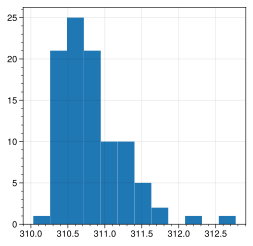

In [5]:
# Make a quick histogram for a feel of how the data is distributed
bins = 12
plt.hist(x, bins=bins);

In [6]:
# Sample histogram, and the mid point (for calculating predicted frequency from fitted distributions)
freq, brk = np.histogram(x, bins=bins)
bin_size = np.diff(brk).mean()
x_mid = (brk + np.roll(brk, shift=-1))[:-1] / 2

In [7]:
# Make a DataFrame containing all the fitted parameters and forzoen distribution (object)
df = pd.DataFrame(
    {'Dist_frozen': '', 'shape': '', 'loc': np.nan, 'scale': np.nan, 'SSE': np.nan},
    index=dists.keys()
)

In [8]:
# List of requested values under different return periods
rp = np.array([1.5, 2, 2.5, 3, 4, 5, 10, 20, 25, 50, 75, 100, 150, 200, 250, 500])
res_df = pd.DataFrame({'Annual return period': rp})

In [9]:
# Sample size and choose the initial guess values for loc and scale estimations
sample_size, init_loc, init_scale = x.size, x.mean(), x.std()

# Fit distributions (params estimations)
for name, dist in dists.items():
    # Fit the distribution
    *shape, loc, scale = dist.fit(data=x, loc=init_loc, scale=init_scale)

    df.at[name, 'shape'] = shape
    df.loc[name, ['loc', 'scale']] = loc, scale

    # Calculate the modelled frequency from the derived distribution (frozen)
    dist_frozen = dist(*shape, loc=loc, scale=scale)
    freq_pred = dist_frozen.pdf(x_mid) * bin_size * sample_size

    df.at[name, 'Dist_frozen'] = dist_frozen

    # Calculate the distribution-modelled SSE
    df.at[name, 'SSE'] = ((freq - freq_pred) ** 2).sum()

    res_df = res_df.join(pd.DataFrame({name: dist_frozen.isf(1/rp)}))

# Order the distribution by SSE in ascending order
df = df.sort_values(by='SSE', ascending=True)
res_df = res_df.loc[:, ['Annual return period'] + df.index.tolist()]

In [10]:
df.style.bar(subset='SSE', color='red').set_caption('Ascending order of SSE')

,Dist_frozen,shape,loc,scale,SSE
GEV,,[-0.058203555953848136],310.617633,0.312105,34.276719
Lognorm,,[0.3818703339481429],309.745201,0.995692,35.999979
Right-skewed Gumbel,,[],310.627489,0.318486,47.064187
Gamma,,[4.658895604643827],309.922779,0.191981,50.627679
Pearson Type III,,[0.9265889426178738],310.817212,0.414393,50.636680
Normal,,[],310.817196,0.434608,215.035238
Exponential,,[],310.032000,0.785196,834.246149
Generalized Pareto,,[-0.10586759913990884],310.032000,0.571730,1256.058089


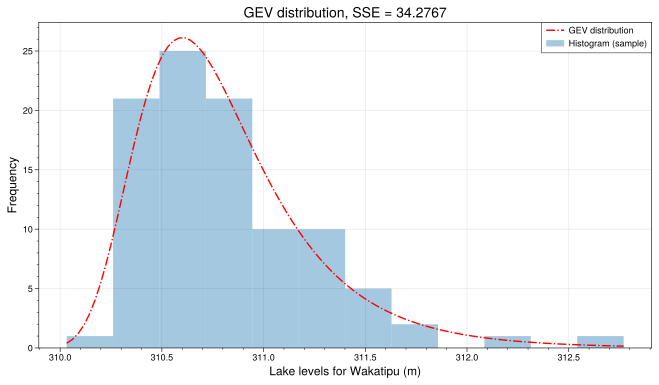

In [11]:
# Create some data for the plot
figsize = (11, 6)
least_sse = df.index[0]
x_plot = np.linspace(x.min(), x.max(), 100)
y_pred = df.iloc[0, :].at['Dist_frozen'].pdf(x_plot) * bin_size * sample_size
xlabel = 'Lake levels for Wakatipu (m)'

# Make a plot of the fitted distribution with the least SSE
fig, ax = plt.subplots(figsize=figsize)
ax.hist(x, bins=bins, density=False, alpha=.4, label='Histogram (sample)')
ax.plot(x_plot, y_pred, 'r-.', lw=1.4, label=f'{least_sse} distribution')
ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title(f'{least_sse} distribution, SSE = {df.iloc[0].at["SSE"]:.4f}', fontsize=14)
ax.legend();

**Results from the fitted dsitributions**

In [12]:
res_df.style.apply(highlight_cols, col_dict={least_sse: 'yellow'})

,Annual return period,GEV,Lognorm,Right-skewed Gumbel,Gamma,Pearson Type III,Normal,Exponential,Generalized Pareto
0,1.500000,310.588360,310.589879,310.597536,310.594718,310.594726,310.629998,310.350370,310.258912
1,2.000000,310.733252,310.740893,310.744219,310.754082,310.754095,310.817196,310.576256,310.414102
2,2.500000,310.831434,310.842036,310.841425,310.858754,310.858771,310.927303,310.751468,310.531264
3,3.000000,310.906909,310.918905,310.914993,310.937031,310.937050,311.004393,310.894626,310.624958
4,4.000000,311.020930,311.033407,311.024291,311.051472,311.051495,311.110335,311.120513,310.769168
5,5.000000,311.106814,311.118304,311.105199,311.134625,311.134650,311.182971,311.295724,310.878041
6,10.000000,311.368055,311.369489,311.344200,311.372211,311.372243,311.374168,311.839980,311.200282
7,20.000000,311.629598,311.611213,311.573455,311.589407,311.589446,311.532062,312.384237,311.499723
8,25.000000,311.714878,311.688171,311.646178,311.656332,311.656372,311.578058,312.559448,311.591539
9,50.000000,311.984824,311.926561,311.870203,311.857255,311.857301,311.709772,313.103704,311.863297


## 3. Statistical tests

This part has been done yet...

## References

* https://nedyoxall.github.io/fitting_all_of_scipys_distributions.html